In [1]:
import mne


In [13]:
sample_data_raw_file = ('edf/INSPEC.INIT.900301000.010217.104300.Signals.Raw_RSEC_01.edited.18.134.318.132.edf')

sample_data_raw_file_AD = ('edf/INSPEC.INIT.921001000.030517.145711.Signals.Raw_RSEO_01.edited.45.194.345.203.edf')

raw = mne.io.read_raw_edf(sample_data_raw_file)

raw_AD = mne.io.read_raw_edf(sample_data_raw_file_AD)

Extracting EDF parameters from c:\Users\jimmy\Documents\CNU\EEG\edf\INSPEC.INIT.900301000.010217.104300.Signals.Raw_RSEC_01.edited.18.134.318.132.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\jimmy\Documents\CNU\EEG\edf\INSPEC.INIT.921001000.030517.145711.Signals.Raw_RSEO_01.edited.45.194.345.203.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
print(raw)
print(raw.info)

<RawEDF | INSPEC.INIT.900301000.010217.104300.Signals.Raw_RSEC_01.edited.18.134.318.132.edf, 30 x 307200 (300.0 s), ~33 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, F7, F8, T4, T6, T5, T3, Fp2, O1, P3, Pz, F3, Fz, F4, C4, ...
 chs: 30 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: 2017-02-01 10:43:00 UTC
 nchan: 30
 projs: []
 sfreq: 1024.0 Hz
>


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)


C:\Users\jimmy\AppData\Local\Temp\ipykernel_21804\677053143.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50)
c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


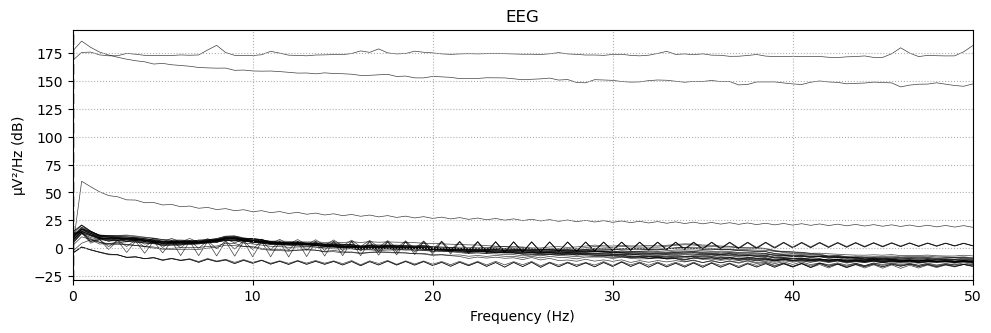

In [19]:
raw.plot_psd(fmax=50)

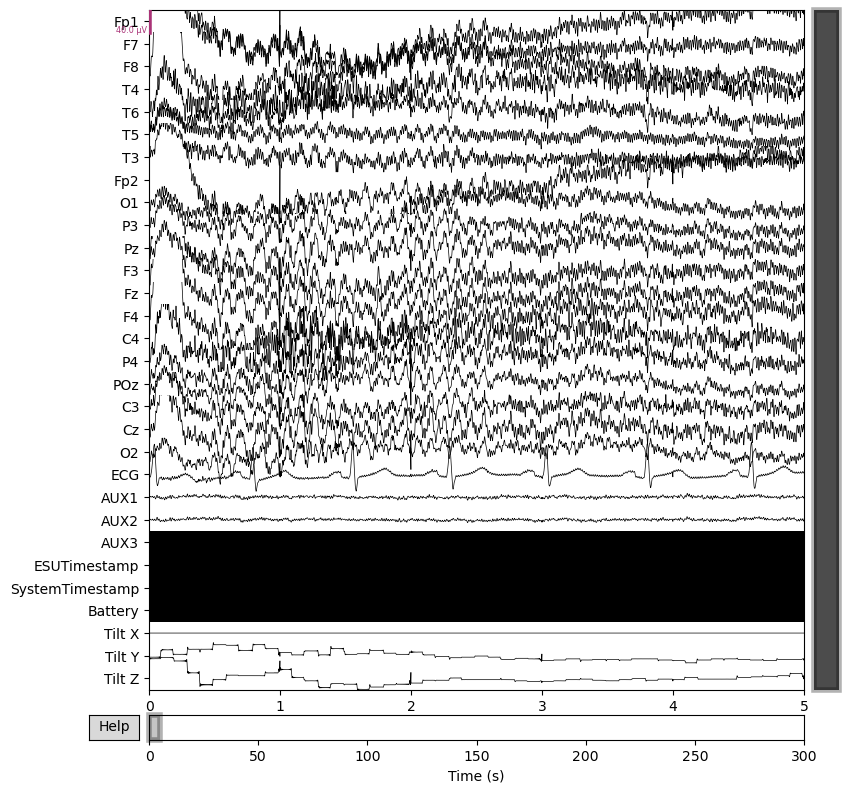

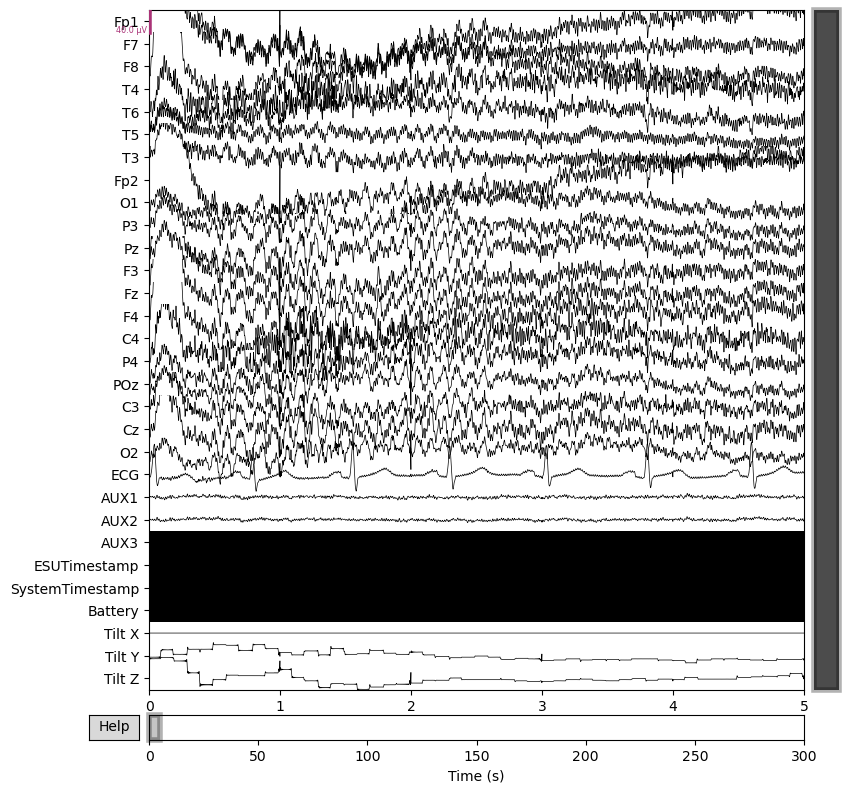

In [26]:
raw.plot(duration=5, n_channels=30)


In [66]:
raw

<RawEDF | INSPEC.INIT.900301000.010217.104300.Signals.Raw_RSEC_01.edited.18.134.318.132.edf, 30 x 307200 (300.0 s), ~33 kB, data not loaded>

Effective window size : 0.250 (s)


C:\Users\jimmy\AppData\Local\Temp\ipykernel_21804\1713621729.py:1: UserWarning: Zero value in spectrum for channel Battery
  spectrum = raw.compute_psd()
C:\Users\jimmy\AppData\Local\Temp\ipykernel_21804\1713621729.py:2: UserWarning: Infinite value in PSD for channel Battery.
These channels might be dead.
  spectrum.plot(average=True)
c:\Users\jimmy\Anaconda3\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


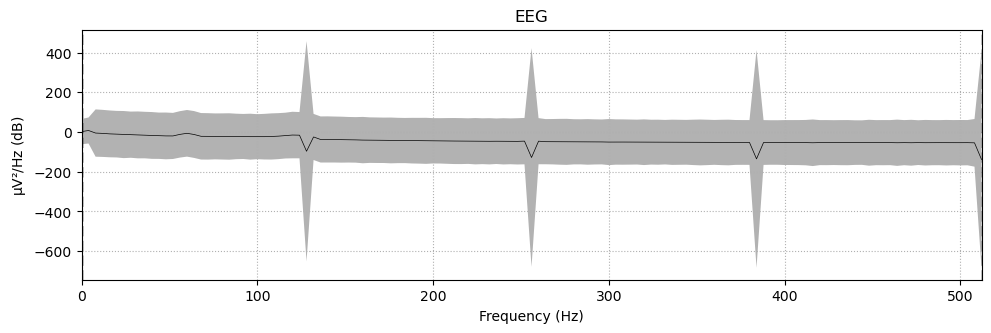

In [72]:
spectrum = raw.compute_psd()
spectrum.plot(average=True)


In [4]:
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd

In [20]:
ch = raw.ch_names[:20]

In [19]:
def get_pearson_matrix(raw, channels): 
    ch = channels
    pearson = {} 

    for c in ch: 
        pearson[c] = {} 
        pearson[c][c] = 1
        
    _ch = ch.copy()
    while(len(_ch) > 0):
        chl1 = _ch.pop(0) 
        for chl2 in _ch:
            raw1, _ = raw[chl1]
            raw2, _ = raw[chl2]

            pearson_c = stats.pearsonr(raw1.flatten(), raw2.flatten())

            pearson[chl1][chl2] = pearson_c[0]
            pearson[chl2][chl1] = pearson_c[0]
    return pearson 


In [15]:
df = pd.DataFrame(pearson)

<AxesSubplot:>

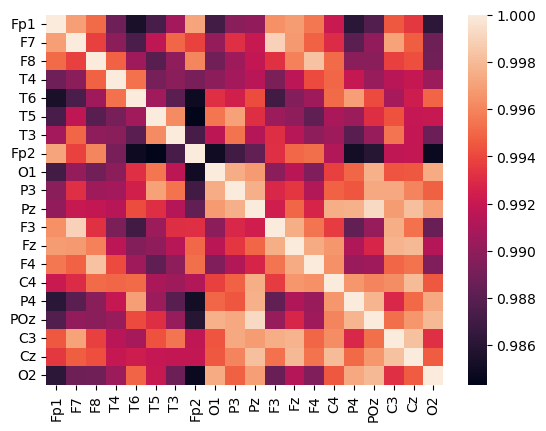

In [16]:
sns.heatmap(df)

In [113]:
def calc_pearson(): 
    

PearsonRResult(statistic=0.858487229751281, pvalue=0.0)